# Goland Wing Flutter Analysis with ROM

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home/ng213/sharpy_cases/utils')
import plot_utils
plt.style.use('report')
from matplotlib import rcParams
# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = ['Arial']
plt.rcParams.update({'font.size': 6, 'axes.labelsize': 6,
                    'xtick.labelsize': 6,
                    'ytick.labelsize': 6})

In [42]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10', 'report']


In [43]:
# Case loader
def load_case(M, N, Ms, n_modes, r, sigma):
    case_name = 'M%dN%dMs%d_nmodes%drom_MIMORA_r%d_sig%04d_%04dj' % (M, N, Ms, n_modes, r, sigma.real*100, sigma.imag*100)
    case_path = 'res/' + case_name
    
    data = dict()
    data['Y_rom'] = np.load(case_path + '/Y_rom.npy')
    try:
        data['Y_fom'] = np.load(case_path + '/Y_fom.npy')
    except FileNotFoundError:
        pass
    data['kv'] = np.load(case_path + '/kv.npy')
    data['u_inf'] = np.load(case_path + '/u_inf.npy')
    data['e_real'] = np.load(case_path + '/e_real.npy')
    data['e_imag'] = np.load(case_path + '/e_imag.npy')
    data['interp_point'] = np.load(case_path + '/interp.npy')
    data['r'] = np.load(case_path + '/r.npy')
    data['case_name'] = case_name
    
    return data
# 03_rom_krylov/02_Goland/res/M16N60Ms18_nmodes4
# 03_rom_krylov/02_Goland/res/M16N60Ms18_nmodes4rom_MIMORA_r2_sig0000_0000j

In [4]:
M = 4
N = 12
Ms = 10
n_modes = 4
r = 2
sigma = 0

data = load_case(M, N, Ms, n_modes, r, sigma)

(0, 100)

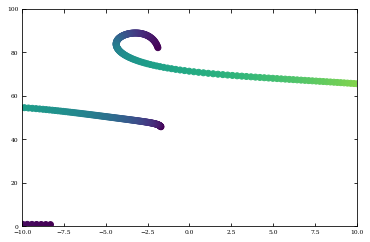

In [5]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(data['e_imag'], data['e_real'], c=data['u_inf'])  # this case was saved with the params the other way round
ax.set_xlim((-10, 10))
ax.set_ylim((0, 100))



In [78]:
M = 16
N = 60
Ms = 18
n_modes = 4
r = 2
sigma = 0

data = load_case(M, N, Ms, n_modes, r, sigma)

(0, 100)

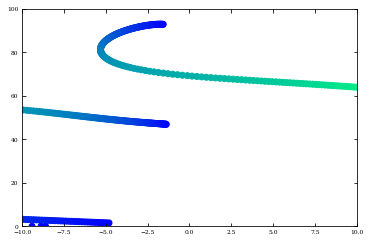

In [79]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(data['e_imag'], data['e_real'], c=data['u_inf'], cmap=plt.cm.winter)  # this case was saved with th eparams the other way
ax.set_xlim((-10, 10))
ax.set_ylim((0, 100))

## Frequency Response Comparison

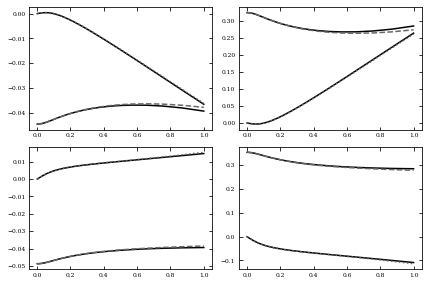

In [80]:
fig, ax = plt.subplots(nrows=2, ncols=2, tight_layout=True)
textwidth = 15/2.54
# fig.set_size_inches((textwidth, 7/2.54))

for i in range(2):
    for j in range(2):
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].real, '-', c='0.0', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].real, '--', c='0.4', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].imag, '-', c='0.0', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].imag, ':', c='0.4', lw=1.5)





### Error analysis

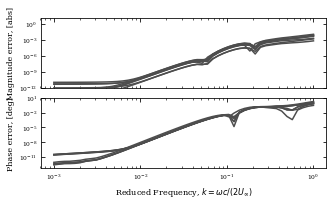

In [81]:
P, M, N = data['Y_rom'].shape
mag_rom = np.abs(np.abs(data['Y_rom']) - np.abs(data['Y_fom']))
ph_rom = np.abs(np.angle(data['Y_rom']) - np.angle(data['Y_fom']))*180/np.pi

error_system = np.abs(data['Y_rom']-data['Y_fom'])

fig, ax = plt.subplots(nrows = 2, sharex=True)
width = 13 / 2.54
height = 7 / 2.54
fig.set_size_inches(width, height)
for i in range(P):
    for j in range(M):
        ax[0].loglog(data['kv'], mag_rom[i, j, :], c='0.3')
        ax[1].loglog(data['kv'], ph_rom[i, j, :], c='0.3')
        

ax[1].set_xlabel('Reduced Frequency, $k = \omega c/(2U_\infty)$')

# ax[0].set_xlabel('Angular Frequency, $\omega$ [rad/s]')    
# ax[0].xaxis.set_label_position('top') 
# ax[0].xaxis.tick_top()
# ax[0].set_yticks(np.logspace(-13, 0, 11))
ax[0].set_ylim(10e-13, 10e0)
c_ref = 1.8288
u_inf = 1
labels = ['%.2f' %it for it in np.logspace(-3, 0, 4)*2.*u_inf/c_ref]

# ax[0].set_xticklabels(labels);

ax[0].set_ylabel('Magnitude error, [abs]')
ax[1].set_ylabel('Phase error, [deg]')
plt.subplots_adjust(wspace=0, hspace=0.15)
# ax[1].grid()
# ax[0].grid()


plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

# fig.set_size_inches(width/2, height)
# plt.savefig('figures/' + data['case_name'] +'_narrow'+ '.eps',
#             bbox_inches='tight', 
#             transparent=True,
#             pad_inches=0.02)
np.save('./uvlm_rom_error_magnitude', mag_rom)
np.save('./uvlm_rom_error_phase', ph_rom)
np.save('./uvlm_rom_frequency', data['kv'])

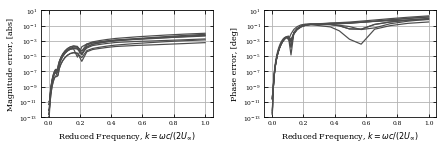

In [101]:
P, M, N = data['Y_rom'].shape
mag_rom = np.abs(np.abs(data['Y_rom']) - np.abs(data['Y_fom']))
ph_rom = np.abs(np.angle(data['Y_rom']) - np.angle(data['Y_fom']))*180/np.pi

error_system = np.abs(data['Y_rom']-data['Y_fom'])

fig, ax = plt.subplots(ncols = 2, sharex=False)
width = 18 / 2.54
height = 5 / 2.54
fig.set_size_inches(width, height)
for i in range(P):
    for j in range(M):
        ax[0].semilogy(data['kv'], mag_rom[i, j, :], c='0.3', lw=1.2)
        ax[1].semilogy(data['kv'], ph_rom[i, j, :], c='0.3', lw=1.2)
        

ax[1].set_xlabel('Reduced Frequency, $k = \omega c/(2U_\infty)$')
ax[0].set_xlabel('Reduced Frequency, $k = \omega c/(2U_\infty)$')


# ax[0].set_xlabel('Angular Frequency, $\omega$ [rad/s]')    
# ax[0].xaxis.set_label_position('top') 
# ax[0].xaxis.tick_top()
# ax[0].set_yticks(np.logspace(-15, 0, 12))
# ax[1].set_yticks(np.logspace(-15, 0, 10))

ax[0].set_ylim(10e-14, 10e0)
ax[1].set_ylim(10e-14, 10e0)
# ax[0].set_xlim(1e-3, 1e0)
# ax[1].set_xlim(1e-3, 1e0)

c_ref = 1.8288
u_inf = 1
labels = ['%.2f' %it for it in np.logspace(-3, 0, 4)*2.*u_inf/c_ref]

# ax[0].set_xticklabels(labels);

ax[0].set_ylabel('Magnitude error, [abs]')
ax[1].set_ylabel('Phase error, [deg]')
plt.subplots_adjust(wspace=0.3, hspace=0)
ax[1].grid()
ax[0].grid()


plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

In [10]:
k_flutter = 70*1.8288/2/164

In [11]:
P

2

# M=30

In [56]:
M = 30
N = 60
Ms = 18
n_modes = 4
r = 2
sigma = 0

data = load_case(M, N, Ms, n_modes, r, sigma)

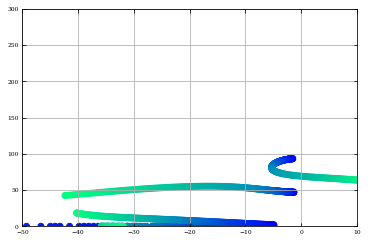

In [57]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(data['e_real'], data['e_imag'], c=data['u_inf'], cmap=plt.cm.winter)  
ax.set_xlim((-50, 10))
ax.set_ylim((0, 300))
ax.grid()

(0, 100)

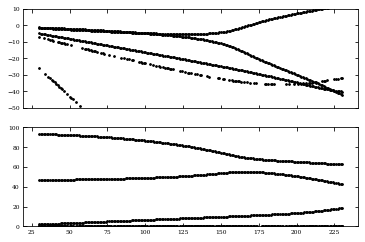

In [58]:
fig, ax = plt.subplots(nrows=2, sharex=True)

ax[0].scatter(data['u_inf'], data['e_real'], c='k', s=3)
ax[0].set_ylim(-50, 10)


ax[1].scatter(data['u_inf'], data['e_imag'], c='k', s=3)
ax[1].set_ylim(0, 100)


In [59]:
# Find flutter frequency discarding all ROM unstable modes

a = np.abs(data['e_real'])<50
b = np.abs(data['e_imag'])<100

u_inf_clean = data['u_inf'][a*b].copy()
e_real_clean = data['e_real'][a*b].copy()
e_imag_clean = data['e_imag'][a*b].copy()

omega_n = np.sqrt(e_real_clean**2 + e_imag_clean**2)
damp = e_real_clean / omega_n

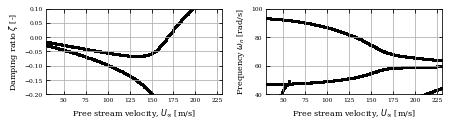

In [76]:
fig, ax = plt.subplots(ncols=2, sharex=False)
width = 18 / 2.54
height = 4 / 2.54
fig.set_size_inches(width, height)
# fig.set_size_inches(width/2, height)
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8})
ax[0].scatter(u_inf_clean, damp, c='k', s=3, marker='s')
ax[0].set_ylim(-0.2, 0.1)
ax[0].set_ylabel('Damping ratio $\zeta$ [-]')
# ax[0].set_yticks(np.linspace(-0.1, 0.2, 7))

ax[1].scatter(u_inf_clean, omega_n, c='k', s=3, marker='s')
ax[1].set_ylim(40, 100)
ax[1].set_xlim(30, 230)
ax[0].set_xlim(30, 230)


ax[1].set_ylabel('Frequency $\omega_n$ [rad/s]')
ax[1].grid()
ax[1].set_yticks(np.linspace(40, 100, 4))
ax[0].grid()
ax[1].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')
ax[0].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')



plt.subplots_adjust(wspace=0.25, hspace=0)

plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

# plt.savefig('figures/' + data['case_name'] +'_narrow'+ '.eps',
#             bbox_inches='tight', 
#             transparent=True,
#             pad_inches=0.02)
# np.save('./damping_ratio', damp)
# np.save('./natural_frequency', omega_n)
# np.save('./freestream_velocity', u_inf_clean)

In [17]:
# Flutter speed and frequency
v_flutter = u_inf_clean[e_real_clean>=0][0]
omega_flutter = omega_n[e_real_clean>=0][0]

In [18]:
omega_flutter

68.97712539120934

In [19]:
k_flutter = omega_flutter * 1.8288 / 2 / v_flutter

In [20]:
k_flutter

0.37321114472024747

In [21]:
data['Y_rom'].shape

(2, 4, 50)

# M = 30, 4 modes

In [22]:
M = 30
N = 60
Ms = 18
n_modes = 8
r = 2
sigma = 0

data = load_case(M, N, Ms, n_modes, r, sigma)

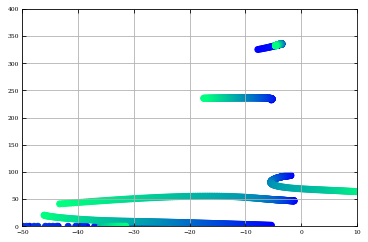

In [23]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(data['e_real'], data['e_imag'], c=data['u_inf'], cmap=plt.cm.winter)  
ax.set_xlim((-50, 10))
ax.set_ylim((0, 400))
ax.grid()

Width: 5.511811023622047


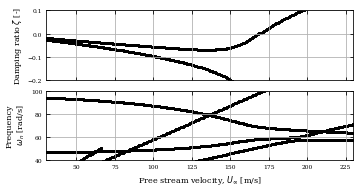

In [51]:
# Find flutter frequency discarding all ROM unstable modes

a = np.abs(data['e_real'])<50
b = np.abs(data['e_imag'])<400
c = np.abs(np.sqrt(data['e_imag']**2 + data['e_imag']**2)<400)

u_inf_clean = data['u_inf'][a*b*c].copy()
e_real_clean = data['e_real'][a*b*c].copy()
e_imag_clean = data['e_imag'][a*b*c].copy()

omega_n = np.sqrt(e_real_clean**2 + e_imag_clean**2)
damp = e_real_clean / omega_n

fig, ax = plt.subplots(nrows=2, sharex=True)
width = 14 / 2.54
height = 7 / 2.54

# fig.set_size_inches(width/2, height)
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8})
ax[0].scatter(u_inf_clean, damp, c='k', s=3, marker='s')
ax[0].set_ylim(-0.2, 0.1)
ax[0].set_ylabel('Damping ratio $\zeta$ [-]')
# ax[0].set_yticks(np.linspace(-1, 0.2, 7))

ax[1].scatter(u_inf_clean, omega_n, c='k', s=3, marker='s')
ax[1].set_ylim(40, 100)
ax[1].set_xlim(30, 230)
ax[1].set_ylabel('Frequency\n $\omega_n$ [rad/s]')
ax[1].grid()
ax[1].set_yticks(np.linspace(40, 100, 4))
ax[0].grid()
ax[1].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')

plt.subplots_adjust(wspace=0.1, hspace=0.15)
fig.set_size_inches(width, height, forward=True)
plt.savefig('figures/' + data['case_name'] + '.pdf',
#             bbox_inches='tight', 
            transparent=True,
#             pad_inches=0.02
           )
print('Width: {}'.format(fig.get_figwidth()))

In [25]:
# Flutter speed and frequency
v_flutter = u_inf_clean[e_real_clean>=0][0]
omega_flutter = omega_n[e_real_clean>=0][0]
print('Flutter speed = %.1f' % v_flutter)
print('Flutter frequency = %.2f' % omega_flutter)

Flutter speed = 31.0
Flutter frequency = 26.88


In [26]:
u_inf_clean[e_real_clean>=0]

array([ 31.,  32.,  34.,  37.,  39.,  40.,  45.,  46.,  47.,  49.,  50.,
        52.,  53.,  54.,  56.,  57., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189., 190., 191., 192., 193., 194., 195., 196.,
       197., 198., 199., 200., 201., 202., 203., 204., 205., 206., 207.,
       208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218.,
       219., 220., 221., 222., 223., 224., 225., 226., 227., 228., 229.,
       230.])

In [27]:
omega_n[e_real_clean>=0]

array([26.88376862, 27.75107743, 29.48573525, 32.08783452, 33.82265049,
       34.6900851 , 39.0275456 , 39.89509825, 40.76267177, 42.49788358,
       43.36552176, 45.10086479, 45.96856924, 46.83629593, 48.57181667,
       49.43961057, 68.87700696, 68.69453386, 68.52247825, 68.3599714 ,
       68.2061861 , 68.06034732, 67.92173741, 67.789698  , 67.66362885,
       67.54298489, 67.42727306, 67.31604727, 67.208906  , 67.10548585,
       67.00545951, 66.90853148, 66.81443441, 66.72292683, 66.63378929,
       66.54682353, 66.4618488 , 66.3787009 , 66.29722984, 66.21729919,
       66.1387835 , 66.06156818, 65.98554813, 65.91062647, 65.83671408,
       65.76372881, 65.69159466, 65.62024114, 65.54960333, 65.47962027,
       65.41023604, 65.34139796, 65.27305718, 65.20516784, 65.13768714,
       65.07057501, 65.00379388, 64.93730832, 64.87108494, 64.80509242,
       64.73930105, 64.67368292, 64.60821147, 64.54286148, 64.47760934,
       64.412432  , 64.3473082 , 64.28221727, 64.21713963, 64.15

# M = 30, 2 modes, 4 moments

In [28]:
M = 30
N = 60
Ms = 18
n_modes = 4
r = 4
sigma = 0

data = load_case(M, N, Ms, n_modes, r, sigma)

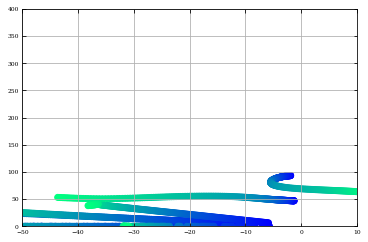

In [29]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(data['e_real'], data['e_imag'], c=data['u_inf'], cmap=plt.cm.winter)  
ax.set_xlim((-50, 10))
ax.set_ylim((0, 400))
ax.grid()

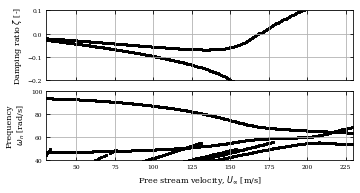

In [30]:
# Find flutter frequency discarding all ROM unstable modes

a = np.abs(data['e_real'])<50
b = np.abs(data['e_imag'])<400
c = np.abs(np.sqrt(data['e_imag']**2 + data['e_imag']**2)<400)

u_inf_clean = data['u_inf'][a*b*c].copy()
e_real_clean = data['e_real'][a*b*c].copy()
e_imag_clean = data['e_imag'][a*b*c].copy()

omega_n = np.sqrt(e_real_clean**2 + e_imag_clean**2)
damp = e_real_clean / omega_n

fig, ax = plt.subplots(nrows=2, sharex=True)
width = 14 / 2.54
height = 7 / 2.54
fig.set_size_inches(width, height)
# fig.set_size_inches(width/2, height)
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8})
ax[0].scatter(u_inf_clean, damp, c='k', s=3, marker='s')
ax[0].set_ylim(-0.2, 0.1)
ax[0].set_ylabel('Damping ratio $\zeta$ [-]')
# ax[0].set_yticks(np.linspace(-1, 0.2, 7))

ax[1].scatter(u_inf_clean, omega_n, c='k', s=3, marker='s')
ax[1].set_ylim(40, 100)
ax[1].set_xlim(30, 230)
ax[1].set_ylabel('Frequency\n $\omega_n$ [rad/s]')
ax[1].grid()
ax[1].set_yticks(np.linspace(40, 100, 4))
ax[0].grid()
ax[1].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')

plt.subplots_adjust(wspace=0.1, hspace=0.15)

plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

In [31]:
# Flutter speed and frequency
v_flutter = u_inf_clean[e_real_clean>=0][0]
omega_flutter = omega_n[e_real_clean>=0][0]
print('Flutter speed = %.1f' % v_flutter)
print('Flutter frequency = %.2f' % omega_flutter)

Flutter speed = 169.0
Flutter frequency = 68.89


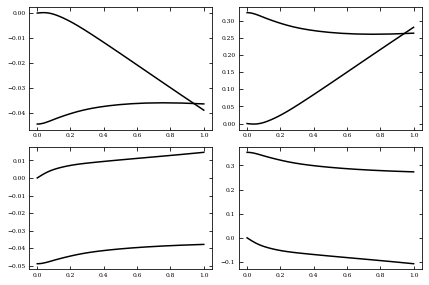

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2, tight_layout=True)
textwidth = 15/2.54
# fig.set_size_inches((textwidth, 7/2.54))

for i in range(2):
    for j in range(2):
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].real, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].real, '--', c='0.4', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].imag, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].imag, ':', c='0.4', lw=1.5)

# M = 30, r = 4

In [33]:
M = 30
N = 60
Ms = 18
n_modes = 4
r = 2
sigma = 0.4j

data = load_case(M, N, Ms, n_modes, r, sigma)

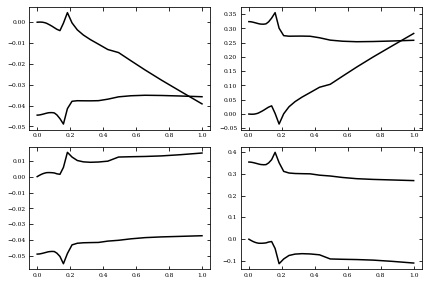

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, tight_layout=True)
textwidth = 15/2.54
# fig.set_size_inches((textwidth, 7/2.54))

for i in range(2):
    for j in range(2):
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].real, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].real, '--', c='0.4', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].imag, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].imag, ':', c='0.4', lw=1.5)

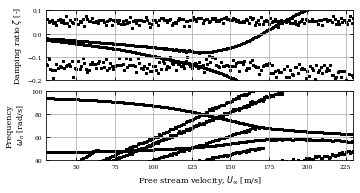

In [35]:
# Find flutter frequency discarding all ROM unstable modes

a = np.abs(data['e_real'])<50
b = np.abs(data['e_imag'])<400
c = np.abs(np.sqrt(data['e_imag']**2 + data['e_imag']**2)<400)

u_inf_clean = data['u_inf'][a*b*c].copy()
e_real_clean = data['e_real'][a*b*c].copy()
e_imag_clean = data['e_imag'][a*b*c].copy()

omega_n = np.sqrt(e_real_clean**2 + e_imag_clean**2)
damp = e_real_clean / omega_n

fig, ax = plt.subplots(nrows=2, sharex=True)
width = 14 / 2.54
height = 7 / 2.54
fig.set_size_inches(width, height)
# fig.set_size_inches(width/2, height)
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8})
ax[0].scatter(u_inf_clean, damp, c='k', s=3, marker='s')
ax[0].set_ylim(-0.2, 0.1)
ax[0].set_ylabel('Damping ratio $\zeta$ [-]')
# ax[0].set_yticks(np.linspace(-1, 0.2, 7))

ax[1].scatter(u_inf_clean, omega_n, c='k', s=3, marker='s')
ax[1].set_ylim(40, 100)
ax[1].set_xlim(30, 230)
ax[1].set_ylabel('Frequency\n $\omega_n$ [rad/s]')
ax[1].grid()
ax[1].set_yticks(np.linspace(40, 100, 4))
ax[0].grid()
ax[1].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')

plt.subplots_adjust(wspace=0.1, hspace=0.15)

plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

# sigma = 0.3

In [36]:
M = 30
N = 60
Ms = 18
n_modes = 4
r = 2
sigma = 0.23j

data = load_case(M, N, Ms, n_modes, r, sigma)

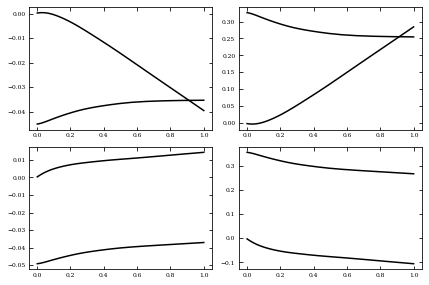

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, tight_layout=True)
textwidth = 15/2.54
# fig.set_size_inches((textwidth, 7/2.54))

for i in range(2):
    for j in range(2):
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].real, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].real, '--', c='0.4', lw=1.5)
        ax[i, j].plot(data['kv'], data['Y_rom'][i, j, :].imag, '-', c='0.0', lw=1.5)
#         ax[i, j].plot(data['kv'], data['Y_fom'][i, j, :].imag, ':', c='0.4', lw=1.5)

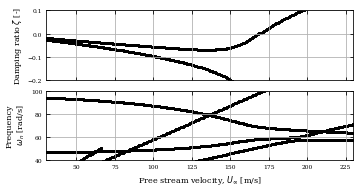

In [38]:
# Find flutter frequency discarding all ROM unstable modes

a = np.abs(data['e_real'])<50
b = np.abs(data['e_imag'])<400
c = np.abs(np.sqrt(data['e_imag']**2 + data['e_imag']**2)<400)

u_inf_clean = data['u_inf'][a*b*c].copy()
e_real_clean = data['e_real'][a*b*c].copy()
e_imag_clean = data['e_imag'][a*b*c].copy()

omega_n = np.sqrt(e_real_clean**2 + e_imag_clean**2)
damp = e_real_clean / omega_n

fig, ax = plt.subplots(nrows=2, sharex=True)
width = 14 / 2.54
height = 7 / 2.54
fig.set_size_inches(width, height)
# fig.set_size_inches(width/2, height)
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8})
ax[0].scatter(u_inf_clean, damp, c='k', s=3, marker='s')
ax[0].set_ylim(-0.2, 0.1)
ax[0].set_ylabel('Damping ratio $\zeta$ [-]')
# ax[0].set_yticks(np.linspace(-1, 0.2, 7))

ax[1].scatter(u_inf_clean, omega_n, c='k', s=3, marker='s')
ax[1].set_ylim(40, 100)
ax[1].set_xlim(30, 230)
ax[1].set_ylabel('Frequency\n $\omega_n$ [rad/s]')
ax[1].grid()
ax[1].set_yticks(np.linspace(40, 100, 4))
ax[0].grid()
ax[1].set_xlabel('Free stream velocity, $U_\infty$ [m/s]')

plt.subplots_adjust(wspace=0.1, hspace=0.15)

plt.savefig('figures/' + data['case_name'] + '.eps',
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

In [39]:
# Flutter speed and frequency
v_flutter = u_inf_clean[e_real_clean>=0][0]
omega_flutter = omega_n[e_real_clean>=0][0]
print('Flutter speed = %.1f' % v_flutter)
print('Flutter frequency = %.2f' % omega_flutter)

Flutter speed = 169.0
Flutter frequency = 68.87


In [40]:
omega_n[e_real_clean>=0]

array([68.86774855, 68.68622913, 68.5150437 , 68.35332926, 68.20028124,
       68.05512156, 67.91717046, 67.78576074, 67.66029917, 67.54025252,
       67.42512467, 67.31448324, 67.20792212, 67.10507801, 67.00562961,
       66.90928865, 66.81577719, 66.72486567, 66.6363328 , 66.54997529,
       66.46561682, 66.38309558, 66.30225872, 66.22296945, 66.14510766,
       66.06855185, 65.99320504, 65.91896188, 65.84573929, 65.77345618,
       65.70202465, 65.63139502, 65.56148237, 65.49224184, 65.42360518,
       65.35552332, 65.28795317, 65.22083693, 65.15414351, 65.08782931,
       65.02185537, 64.95618788, 64.89079124, 64.82563633, 64.76068926,
       64.69592862, 64.6313224 , 64.56684896, 64.50248557, 64.43820562,
       64.37398719, 64.30981534, 64.2456646 , 64.18152421, 64.11736274,
       64.05317863, 63.98894595, 63.92464593, 63.86027341, 63.79580929,
       63.73123897, 63.66654979])